In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv("cleaned_SFM_dataset_2019_2022.csv")

In [3]:
df['t_date'] = pd.to_datetime(df['transaction_date'], format="%d/%m/%Y") 
df['t_date'] = df['t_date'].dt.to_period('M').dt.start_time

df = df[df['t_date'] < '2022-01'] #3 full years of data


In [4]:
# Step 1: Filter for meat-related commodities (to get baskets that contain meat)
meat = df[df.commodity.str.lower().str.contains('Meat|Beef|Chicken|Seafood|Pork', case=False)].copy()

# Step 2: Find the unique basket_ids containing meat
meat_basket_ids = meat['basket_id'].unique()

# Step 3: Filter the dataset for baskets that contain meat, excluding the meat commodity itself
non_meat_basket_df = df[(df['basket_id'].isin(meat_basket_ids)) & 
                         (~df['commodity'].str.lower().str.contains('Meat|Beef|Chicken|Seafood|Pork', case=False))]

# Step 4: Analyze the top 10 most popular commodities in these baskets (excluding meat)
top_commodities_with_meat = non_meat_basket_df.groupby('commodity').agg(total_revenue=('price', 'sum')) \
    .sort_values('total_revenue', ascending=False).head(10)

top_commodities_with_meat



,total_revenue
commodity,
Cheese,5500.57
Salad,4913.44
Candy,3906.16
Cigarettes,3905.03
Soft drinks,3546.15
Cakes,2896.54
Fluid milk products,2882.07
Refrigerated,2624.02
Bread,2493.37


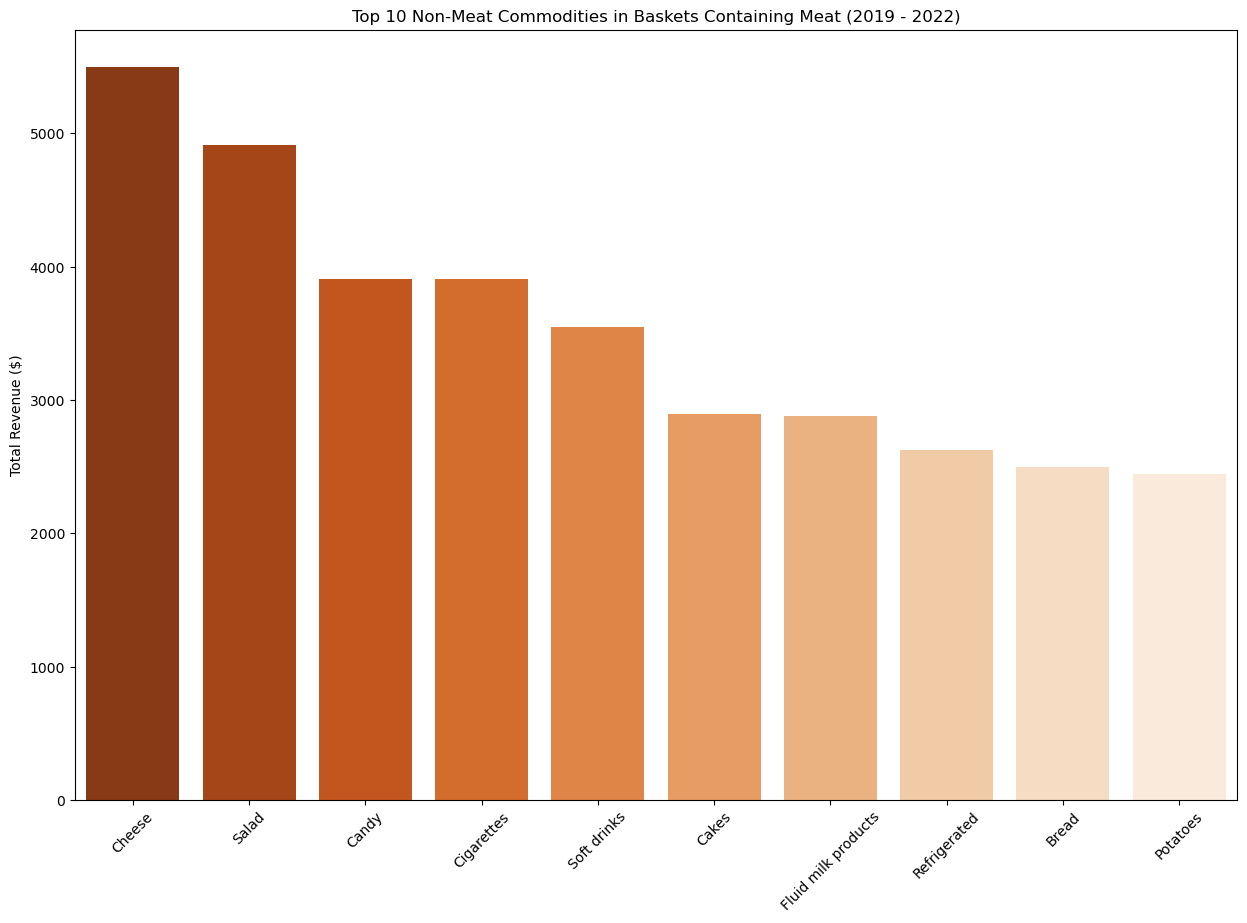

In [5]:
plt.figure(figsize=(15,10))
sns.barplot(x=top_commodities_with_meat.index, 
            y=top_commodities_with_meat['total_revenue'], 
            hue=top_commodities_with_meat.index, 
            palette='Oranges_r', 
            legend=False)


plt.title('Top 10 Non-Meat Commodities in Baskets Containing Meat (2019 - 2022)')
plt.xlabel('')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)

plt.savefig(f"Plots/{plt.gca().get_title()}.svg", format="svg", dpi=300, bbox_inches="tight")
plt.show;